In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


#iris dataset

Best k: 1
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



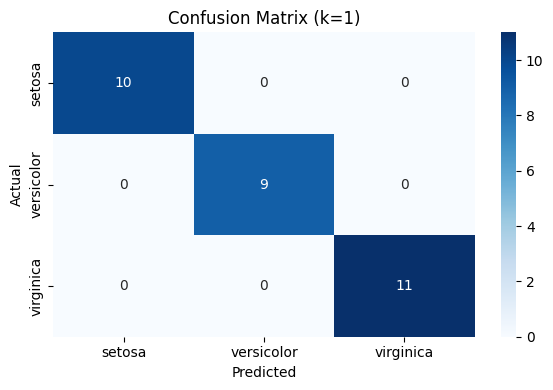

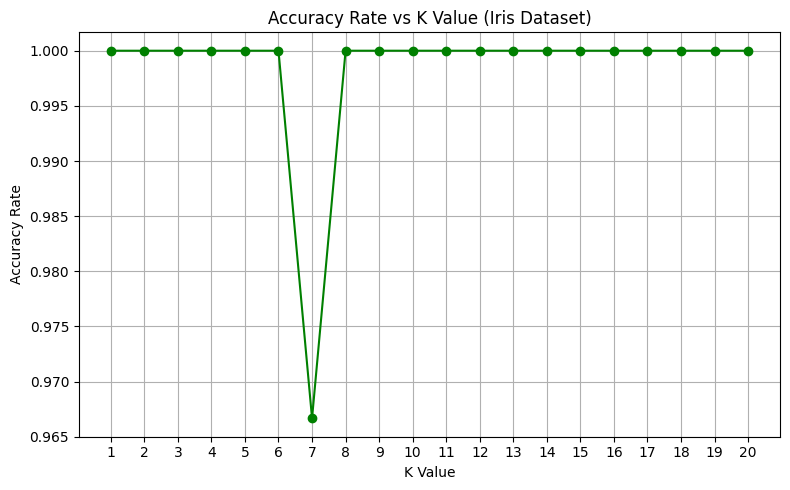

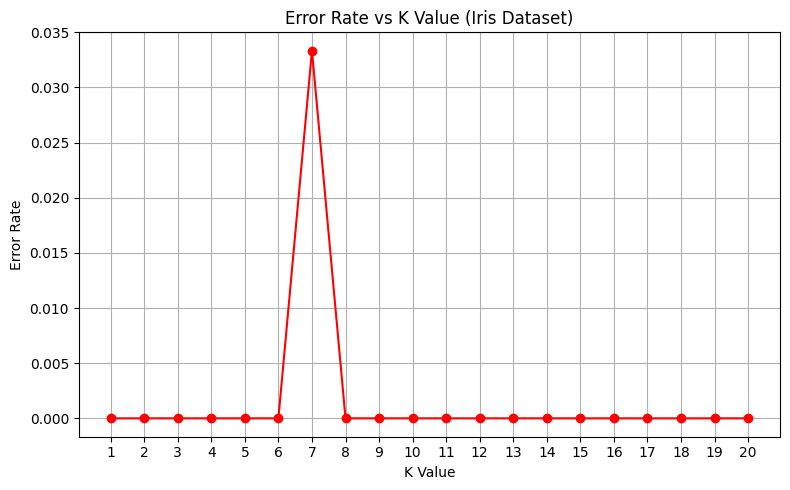

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("iris.csv")

# Features and target
X = df.drop('species', axis=1)
y = df['species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Find best k (1 to 20)
scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

best_k = k_range[scores.index(max(scores))]

# Train with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predictions
y_pred = knn_final.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}")
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (k={best_k})')
plt.tight_layout()
plt.show()

# Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o', linestyle='-', color='green')
plt.title('Accuracy Rate vs K Value (Iris Dataset)')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate error rates
errors = [1 - acc for acc in scores]

# Plot Error Rate vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, errors, marker='o', linestyle='-', color='red')
plt.title('Error Rate vs K Value (Iris Dataset)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()



Daibetes dataset

Best k value: 18
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



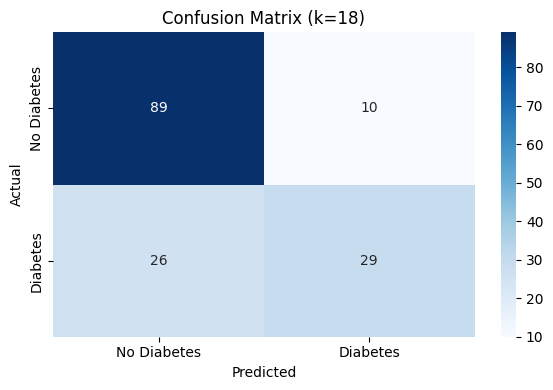

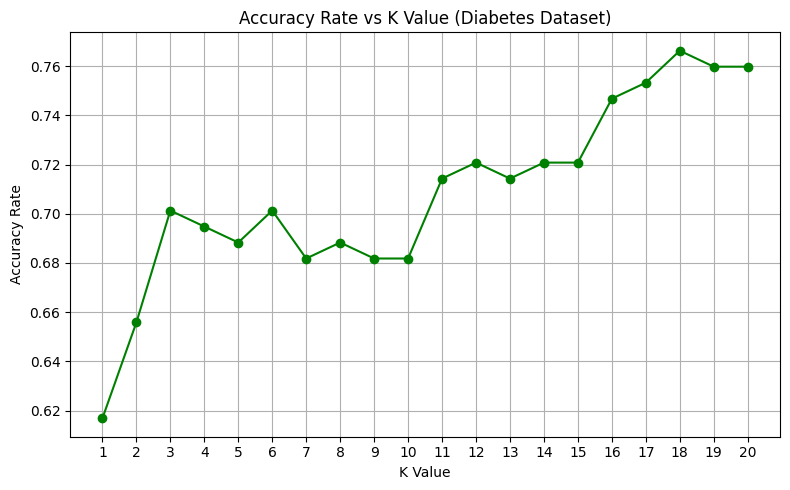

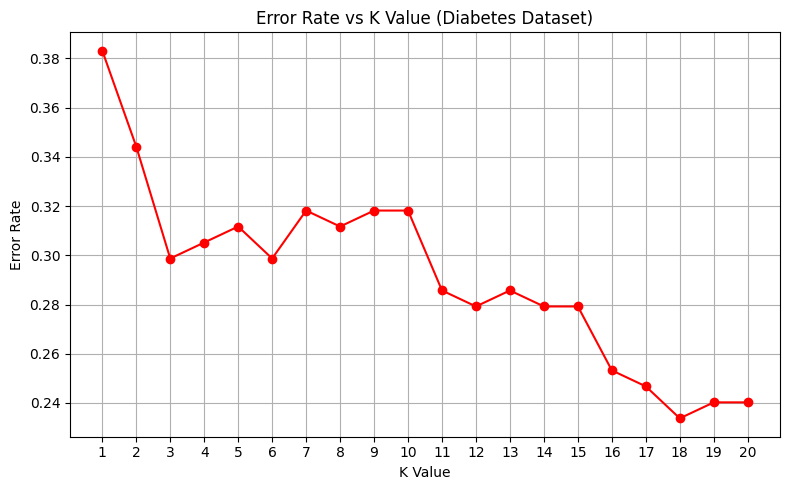

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best k from range 1 to 20
k_scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_scores.append(knn.score(X_test, y_test))

# Best k value
best_k = k_range[k_scores.index(max(k_scores))]
print(f"Best k value: {best_k}")

# Train final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predictions
y_pred = knn_final.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (k={best_k})')
plt.tight_layout()
plt.show()

# Plot Accuracy Rate vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='green')
plt.title('Accuracy Rate vs K Value (Diabetes Dataset)')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate error rate
error_rates = [1 - acc for acc in k_scores]

# Plot Error Rate vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, error_rates, marker='o', linestyle='-', color='red')
plt.title('Error Rate vs K Value (Diabetes Dataset)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()



heart dataset

Best k value: 6
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



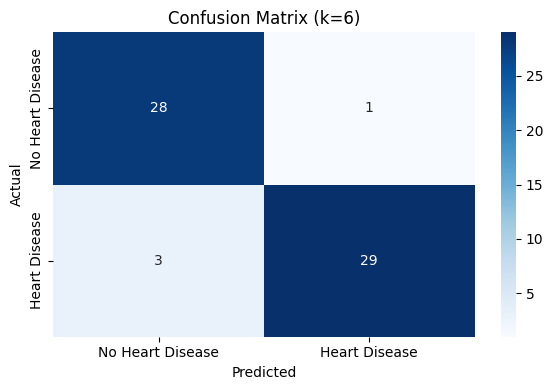

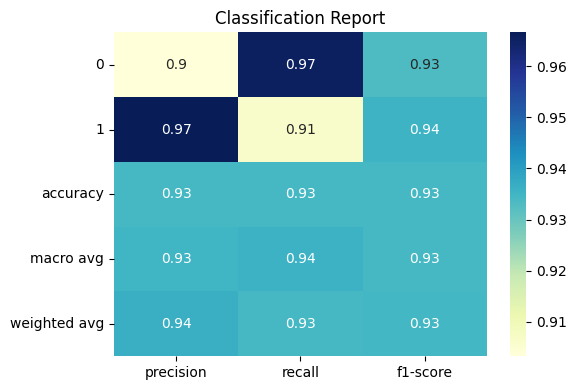

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find best k value (1 to 20)
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_scores.append(knn.score(X_test, y_test))

best_k = k_range[k_scores.index(max(k_scores))]
print(f"Best k value: {best_k}")

# Train final model with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predictions
y_pred = knn_final.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (k={best_k})")
plt.tight_layout()
plt.show()

# Plot classification report as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.tight_layout()
plt.show()


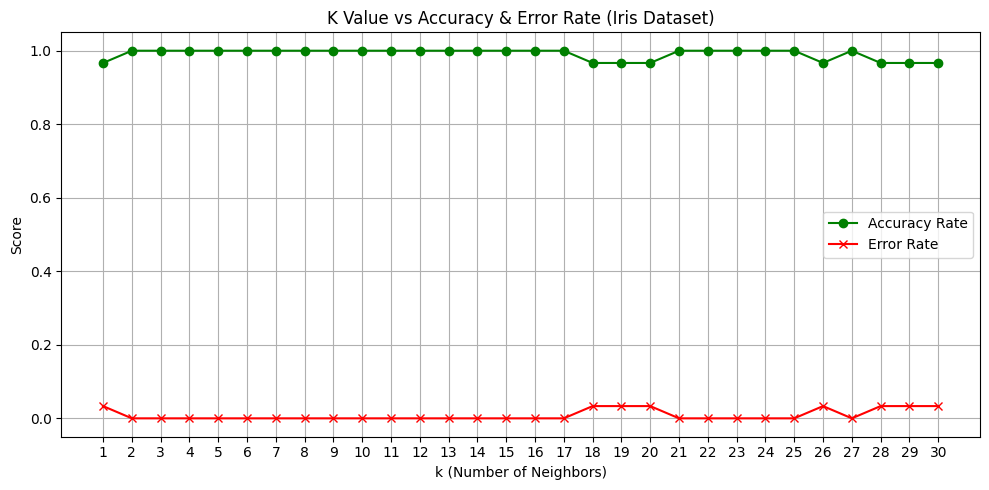

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different values of k
k_range = range(1, 31)
accuracies = []
errors = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    errors.append(1 - acc)

# Plot accuracy and error rate
plt.figure(figsize=(10,5))

plt.plot(k_range, accuracies, marker='o', label='Accuracy Rate', color='green')
plt.plot(k_range, errors, marker='x', label='Error Rate', color='red')

plt.title("K Value vs Accuracy & Error Rate (Iris Dataset)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Score")
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


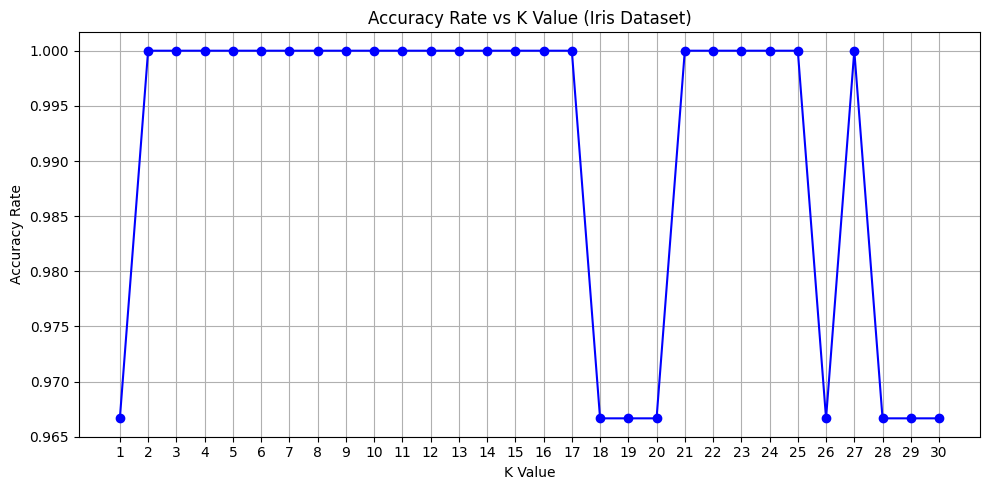

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Range of k values to try
k_range = range(1, 31)
accuracies = []

# Test each k and store accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', color='blue', linestyle='-')
plt.title('Accuracy Rate vs K Value (Iris Dataset)')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()
